<a href="https://colab.research.google.com/github/adityasukhwani/DL_Lab/blob/master/AdityaSukhwani_EX2_week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
!pip install -q -U keras-tuner
import keras_tuner as kt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

     |████████████████████████████████| 135 kB 36.5 MB/s 


In [ ]:
df = pd.read_csv("bodyfat.csv")
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [ ]:
X=df.drop('BodyFat', axis=1)
y=df['BodyFat']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
dict_hyp = {'activation': [], 'regularization': [], 'layers': [ ], 'lr': [ ],'epochs': [ ],'rmse':[ ] }
df_hyp = pd.DataFrame(dict_hyp)
m = {1:128,2:64,3:32}
for activation in ['sigmoid','relu']:
  for reg in [None,'l1','l2']:
    for layer in range(1,4):
      model = keras.Sequential()
      model.add(tf.keras.Input(shape=(X.shape[1],)))
      for i in range(0,layer):
        model.add(keras.layers.Dense(units = m[i+1],activation=activation,kernel_regularizer=reg))
      model.add(keras.layers.Dense(1))
      for lr in [1.0, 0.3, 0.1, 0.01,0.03,0.001,0.0001,0.00001]:
        for epochs in [10,20,30,40]:
          model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),metrics=[keras.metrics.RootMeanSquaredError()],loss='mse')
          history1 = model.fit(X_train, y_train, epochs=epochs, validation_split=0.15)
          dict_hyp = {'activation':activation , 'regularization': reg, 'layers':layer, 'lr':lr,'epochs':epochs,'rmse':history1.history['root_mean_squared_error']}
          df_hyp = df_hyp.append(dict_hyp,ignore_index=True)

Streaming output truncated to the last 5000 lines.
6/6 [==============================] - 1s 41ms/step - loss: 76.3525 - root_mean_squared_error: 8.7379 - val_loss: 65.3307 - val_root_mean_squared_error: 8.0827
Epoch 2/10
6/6 [==============================] - 0s 9ms/step - loss: 76.3521 - root_mean_squared_error: 8.7379 - val_loss: 65.3305 - val_root_mean_squared_error: 8.0827
Epoch 3/10
6/6 [==============================] - 0s 9ms/step - loss: 76.3520 - root_mean_squared_error: 8.7379 - val_loss: 65.3305 - val_root_mean_squared_error: 8.0827
Epoch 4/10
6/6 [==============================] - 0s 12ms/step - loss: 76.3520 - root_mean_squared_error: 8.7379 - val_loss: 65.3304 - val_root_mean_squared_error: 8.0827
Epoch 5/10
6/6 [==============================] - 0s 13ms/step - loss: 76.3519 - root_mean_squared_error: 8.7379 - val_loss: 65.3304 - val_root_mean_squared_error: 8.0827
Epoch 6/10
6/6 [==============================] - 0s 10ms/step - loss: 76.3519 - root_mean_squared_error: 8

In [ ]:
df_hyp

,activation,regularization,layers,lr,epochs,rmse
0,sigmoid,None,1.0,1.00000,10.0,"[29.513235092163086, 18.873973846435547, 13.17..."
1,sigmoid,None,1.0,1.00000,20.0,"[33.1141357421875, 16.628707885742188, 11.1014..."
2,sigmoid,None,1.0,1.00000,30.0,"[27.811222076416016, 14.2381010055542, 9.57312..."
3,sigmoid,None,1.0,1.00000,40.0,"[21.338838577270508, 11.889888763427734, 10.86..."
4,sigmoid,None,1.0,0.30000,10.0,"[4.6685380935668945, 3.2313554286956787, 2.685..."
...,...,...,...,...,...,...
571,relu,l2,3.0,0.00010,40.0,"[8.737933158874512, 8.737934112548828, 8.73793..."
572,relu,l2,3.0,0.00001,10.0,"[8.737932205200195, 8.737930297851562, 8.73793..."
573,relu,l2,3.0,0.00001,20.0,"[8.737931251525879, 8.737930297851562, 8.73793..."
574,relu,l2,3.0,0.00001,30.0,"[8.737931251525879, 8.737931251525879, 8.73793..."


In [ ]:
def model_builder(hp):
  model = keras.Sequential()
  model.add(tf.keras.Input(shape=(X.shape[1],)))

  m = {1:128,2:64,3:32}
  hp_activation = hp.Choice('activation',values = ['sigmoid','relu'])
  hp_reg = hp.Choice('reg',values = ['l1','l2'])
  for i in range(1,hp.Int('num_layers',2,4)):
    model.add(keras.layers.Dense(units = m[i],activation=hp_activation,kernel_regularizer=hp_reg))


  model.add(keras.layers.Dense(1))

  hp_learning_rate = hp.Choice('learning_rate', values=[1.0, 0.3, 0.1, 0.01,0.03,0.001,0.0001,0.00001])
  
  
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                metrics=[keras.metrics.RootMeanSquaredError()],loss='mse')

  return model

In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective='val_loss',
                     max_epochs=40,
                     factor=3)

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
tuner.search(X_train, y_train, epochs=50, validation_split=0.15, callbacks=[stop_early])
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The hyperparameter search is complete.
Best Activation - {best_hps.get('activation')}.
Best Regularizer - {best_hps.get('reg')}.
Best lr - {best_hps.get('learning_rate')}.
Best Number of Layers - {best_hps.get('num_layers')}
""")

Trial 90 Complete [00h 00m 04s]
val_loss: 382.2698974609375

Best val_loss So Far: 0.8769500851631165
Total elapsed time: 00h 02m 13s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit



The hyperparameter search is complete.
Best Activation - relu.
Best Regularizer - l2.
Best lr - 0.03.
Best Number of Layers - 2



In [ ]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.15)

Epoch 1/50
6/6 [==============================] - 0s 26ms/step - loss: 333.3036 - root_mean_squared_error: 18.2478 - val_loss: 100.5087 - val_root_mean_squared_error: 9.9991
Epoch 2/50
6/6 [==============================] - 0s 6ms/step - loss: 234.7090 - root_mean_squared_error: 15.2992 - val_loss: 123.6398 - val_root_mean_squared_error: 11.0896
Epoch 3/50
6/6 [==============================] - 0s 7ms/step - loss: 111.3729 - root_mean_squared_error: 10.5231 - val_loss: 59.8759 - val_root_mean_squared_error: 7.6971
Epoch 4/50
6/6 [==============================] - 0s 7ms/step - loss: 58.7584 - root_mean_squared_error: 7.6217 - val_loss: 32.8654 - val_root_mean_squared_error: 5.6675
Epoch 5/50
6/6 [==============================] - 0s 7ms/step - loss: 27.5472 - root_mean_squared_error: 5.1717 - val_loss: 17.0444 - val_root_mean_squared_error: 4.0215
Epoch 6/50
6/6 [==============================] - 0s 7ms/step - loss: 15.8222 - root_mean_squared_error: 3.8634 - val_loss: 10.9457 - val_ro

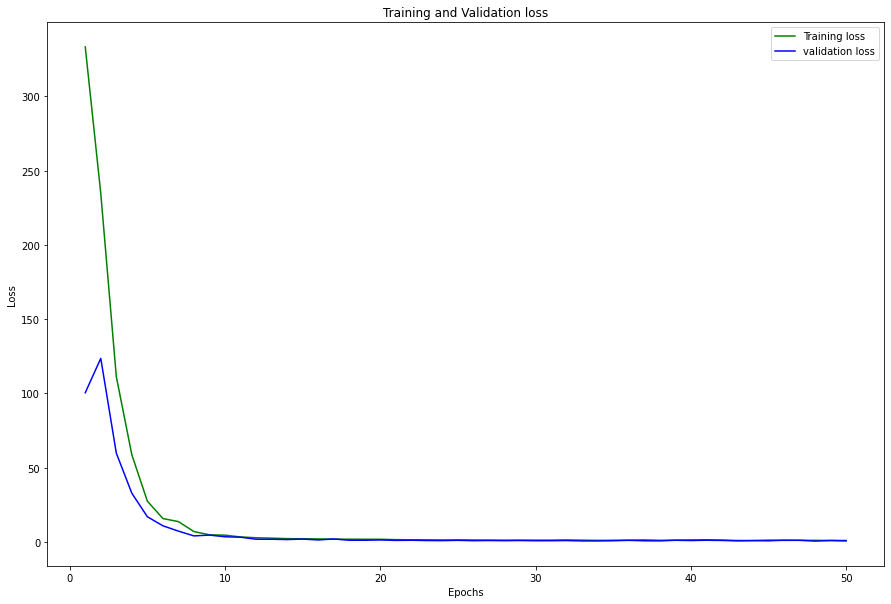

In [ ]:
import matplotlib.pyplot as plt
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,51)
plt.figure(figsize=(15,10)) 
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')

plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()